<a href="https://colab.research.google.com/github/Ambar103/Customer-Segmentation-and-Product-Recommendations-in-E-Commerce/blob/main/Customer_Segmentation_and_Product_Recommendations_in_E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -     
##Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce

##### **Project Type**    -
- Unsupervised Machine Learning – Clustering
- Collaborative Filtering – Recommendation System

##### **Contribution**    - Individual
- Ambar S

# **Project Summary -**

###Shopper Spectrum: Customer Analytics Dashboard
- Project Highlights
- Cleaned & preprocessed 541k+ retail transactions

- Conducted EDA: top products, sales by country, monthly trends

- Built Customer Segmentation using KMeans (k=4, Silhouette = 0.616)

- Profiles identified:

 - High‑Value Champions

 - Loyal Premium Customers

 - Regular Buyers

 - At‑Risk Customers

- Performed Hypothesis Testing (ANOVA & Pearson) → validated insights

- Developed Item‑based Collaborative Filtering recommender

- Deployed as an interactive Streamlit app (ngrok in Colab)

- Business Impact
 - Targeted Marketing → segment‑wise strategies

 - Customer Retention → re‑engage at‑risk buyers

 - Boost Sales → cross‑selling via product recommendations

 - Data‑Driven Decisions → validated with statistical tests

# **GitHub Link -**
https://github.com/Ambar103/Customer-Segmentation-and-Product-Recommendations-in-E-Commerce

# **Problem Statement** -

**The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.**

# **MAIN PROJECT**

##**1. Know Your Data**

### Import Libraries for dataset cleaning and preprocessing

In [ ]:
!pip install streamlit

In [ ]:
#importing libraries



# Data handling and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning (Clustering & Scaling)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Recommendation system (similarity calculations)
from sklearn.metrics.pairwise import cosine_similarity

# Warnings (to suppress unnecessary warnings)
import warnings
warnings.filterwarnings('ignore')

# Streamlit for web app deployment
import streamlit as st

# Date and time handling
from datetime import datetime

# For pivot tables (used in recommendation heatmap)
import scipy.sparse as sp


### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/online_retail.csv'


Mounted at /content/drive


In [ ]:
df= pd.read_csv(path)

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_columns = df.shape

print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_columns}')

Number of rows: 541909
Number of columns: 8


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


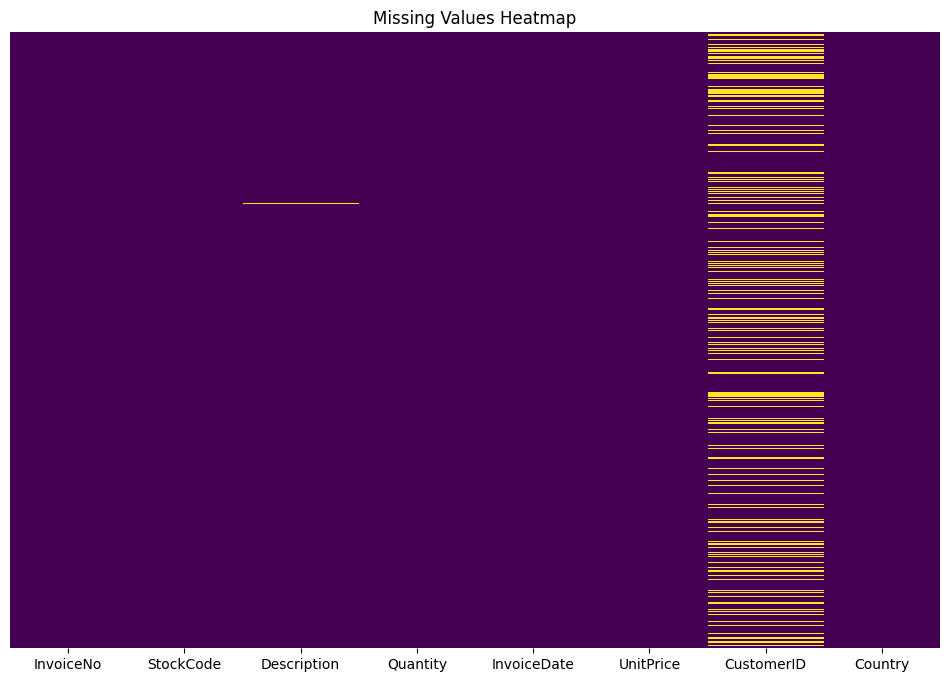

In [ ]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()

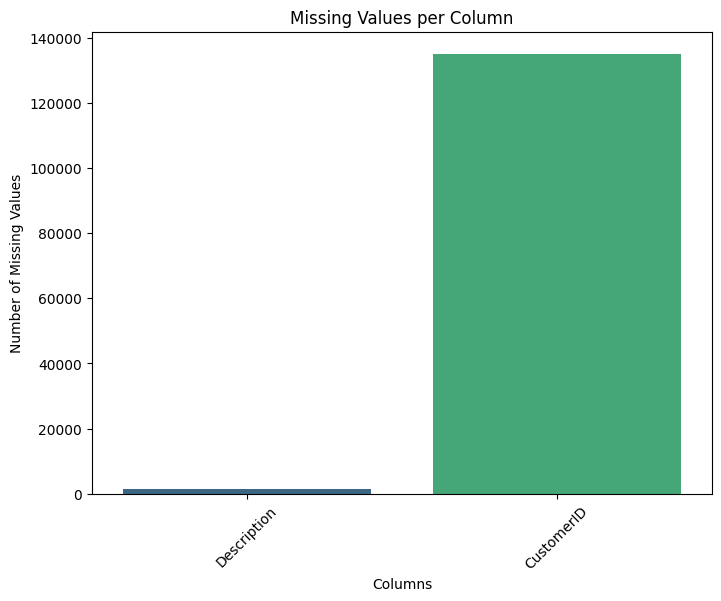

In [ ]:
# Bar Chart of Missing Values

missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # filter only columns with missing values

plt.figure(figsize=(8,6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.show()


### What did you know about your dataset?

The dataset contains 541,909 transactions with 8 columns, representing online retail purchases. It includes details such as invoice number, product code, product description, quantity purchased, date of purchase, unit price, customer ID, and country.
From the initial exploration, I found:

- Around 25% of CustomerID values are missing, which must be removed for analysis.

- 1,454 product descriptions are missing, a very small fraction of the data.

- There are 5,268 duplicate rows that need to be dropped.

- The InvoiceDate column is in object format and will require conversion to datetime for time-based analysis.

- Overall, the dataset is rich and suitable for customer segmentation (RFM analysis) and product recommendation tasks after preprocessing.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [ ]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:

# Data Wrangling / Preprocessing


# 1. Remove duplicate rows
df = df.drop_duplicates()
print(" Duplicates removed. New shape:", df.shape)

# 2. Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])
print(" Missing CustomerIDs removed. New shape:", df.shape)

# 3. Remove cancelled invoices (InvoiceNo starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]
print(" Cancelled invoices removed. New shape:", df.shape)

# 4. Remove rows with negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
print(" Negative/Zero Quantity & UnitPrice removed. New shape:", df.shape)

# 5. Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
print(" InvoiceDate converted to datetime.")

# 6. Ensure CustomerID is integer type
df['CustomerID'] = df['CustomerID'].astype(int)
print(" CustomerID converted to integer.")

df.head()

 Duplicates removed. New shape: (536641, 8)
 Missing CustomerIDs removed. New shape: (401604, 8)
 Cancelled invoices removed. New shape: (392732, 8)
 Negative/Zero Quantity & UnitPrice removed. New shape: (392692, 8)
 InvoiceDate converted to datetime.
 CustomerID converted to integer.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850,United Kingdom


### What all manipulations have you done and insights you found?

Manipulations Done:

Removed Duplicate Rows → 5,268 duplicates dropped to avoid redundancy.

- Dropped Missing CustomerIDs → ~135,000 rows removed since CustomerID is crucial for RFM analysis.

- Excluded Cancelled Invoices → Transactions with InvoiceNo starting with “C” were removed.

- Filtered Out Invalid Quantities & Prices → Removed rows with negative or zero values in Quantity and UnitPrice.

- Converted InvoiceDate to Datetime → Enabled time-based analysis (Recency).

- Standardized CustomerID to Integer → Ensured consistency for clustering and recommendations.

Key Insights Found:

- A significant portion of rows (~25%) lacked CustomerID, which could distort customer-level analysis if kept.

- Negative Quantity values corresponded to returns/cancellations, which were removed.

- Some UnitPrice values were zero or negative, indicating errors or invalid records.

- The dataset originally had 541,909 rows, which reduced after cleaning, leaving a more reliable dataset for analysis.

- Clean data is now ready for Exploratory Data Analysis (EDA) and RFM-based Customer Segmentation.














## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Analyze transaction volume by country

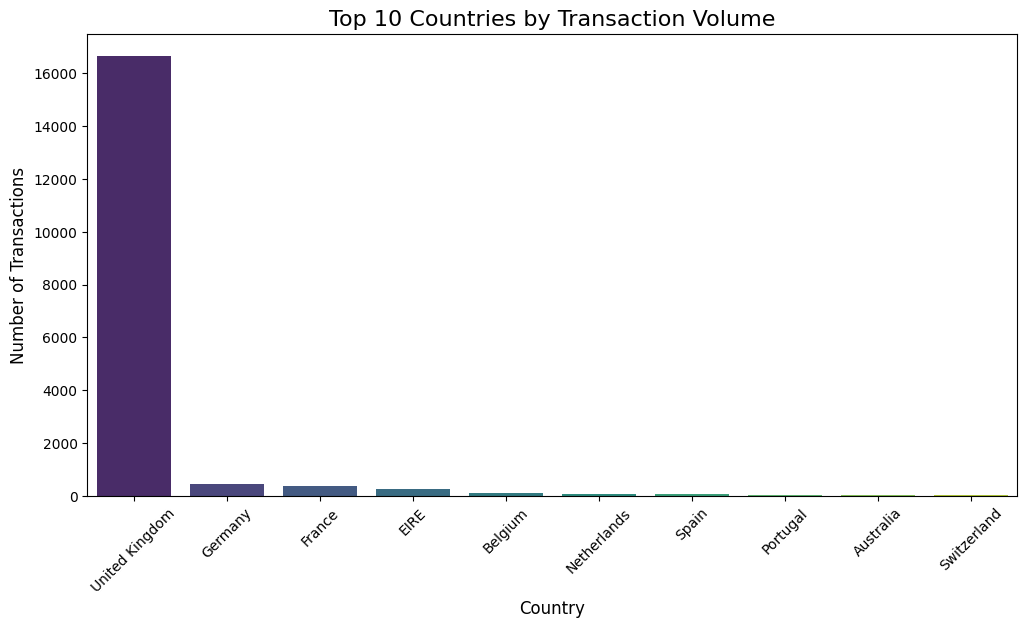

,InvoiceNo
Country,
United Kingdom,16646
Germany,457
France,389
EIRE,260
Belgium,98
Netherlands,94
Spain,90
Portugal,57
Australia,57


In [ ]:

#  Transaction Volume by Country

# Group data by country and count number of transactions (invoices)
country_sales = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False)

# Plot the top 10 countries by transaction volume
plt.figure(figsize=(12,6))
sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10).values, palette="viridis")
plt.title("Top 10 Countries by Transaction Volume", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Show full list sorted
country_sales


##### 1. Why did you pick the specific chart?

To compare sales distribution across different markets.

##### 2. What is/are the insight(s) found from the chart?

Insights: The United Kingdom dominates with far more transactions than any other country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact: Helps target marketing and logistics strategies toward the most active regions.



#### Identify top-selling products


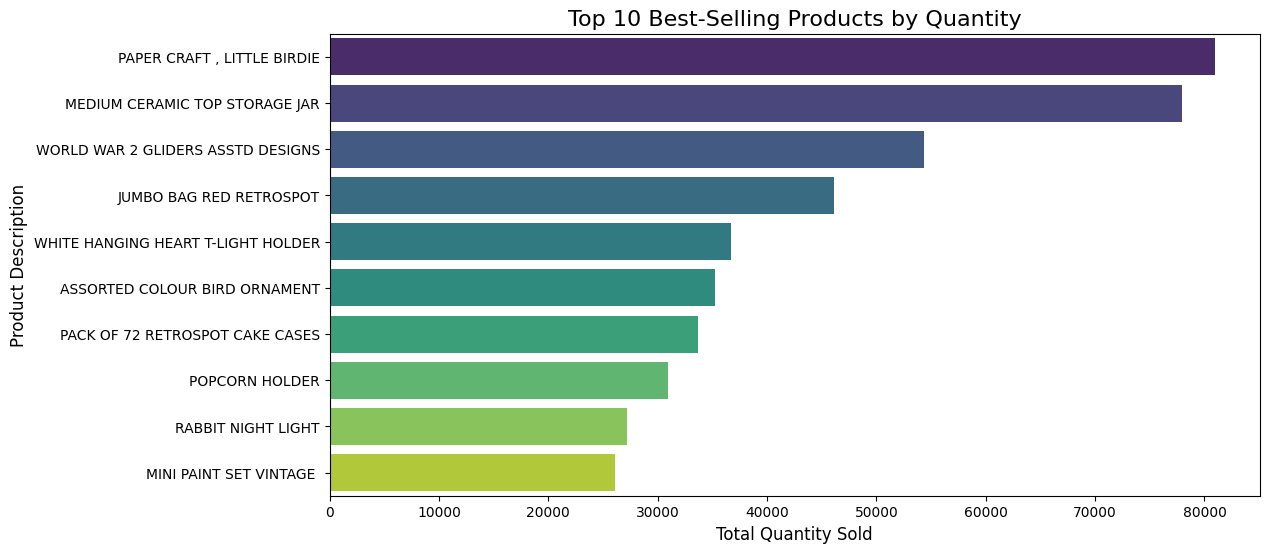

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",80995
MEDIUM CERAMIC TOP STORAGE JAR,77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
JUMBO BAG RED RETROSPOT,46078
WHITE HANGING HEART T-LIGHT HOLDER,36706
ASSORTED COLOUR BIRD ORNAMENT,35263
PACK OF 72 RETROSPOT CAKE CASES,33670
POPCORN HOLDER,30919
RABBIT NIGHT LIGHT,27153


In [ ]:
#  Top-Selling Products


# Group by product description and sum the quantities
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Plot the top 10 products
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.head(10).values, y=top_products.head(10).index, palette="viridis")
plt.title("Top 10 Best-Selling Products by Quantity", fontsize=16)
plt.xlabel("Total Quantity Sold", fontsize=12)
plt.ylabel("Product Description", fontsize=12)
plt.show()

# Display the top 10 in table form
top_products.head(10)


##### 1. Why did you pick the specific chart?

Why this chart? To identify which products contribute most to total sales volume.



##### 2. What is/are the insight(s) found from the chart?

Insights: A few products (like Paper Craft, Little Birdie) generate the bulk of sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact: Guides inventory planning and product-focused promotions to maximize revenue.

#### Visualize purchase trends over time

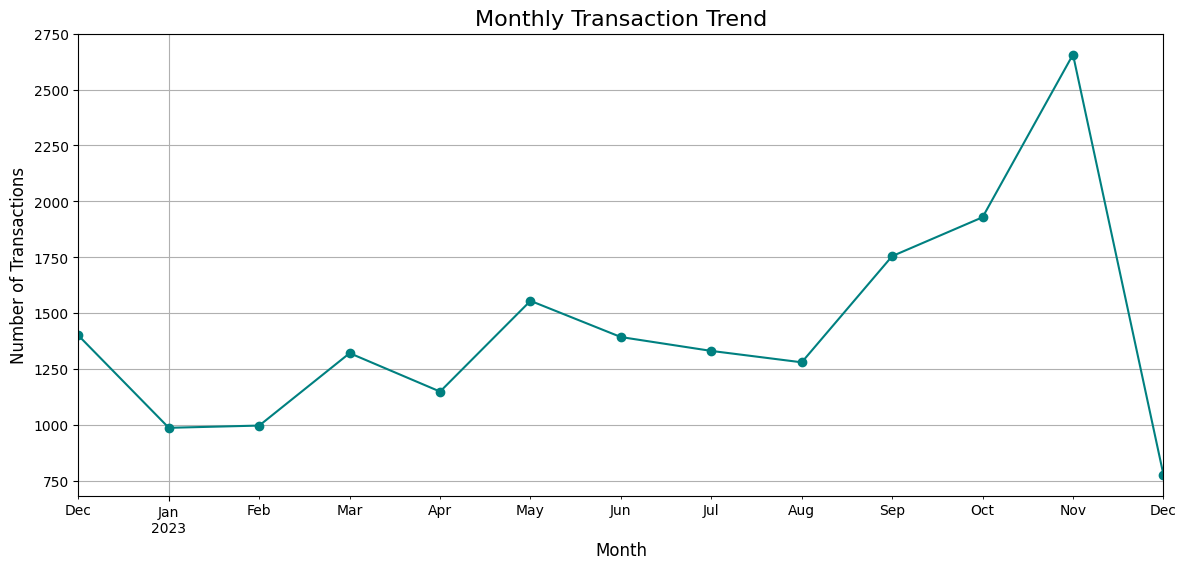

,InvoiceNo
InvoiceMonth,
2022-12,1400
2023-01,987
2023-02,997
2023-03,1321
2023-04,1149
2023-05,1555
2023-06,1393
2023-07,1331
2023-08,1280


In [ ]:
#  Purchase Trends Over Time

# Create a new column for the invoice month
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by month and count number of transactions
monthly_sales = df.groupby('InvoiceMonth')['InvoiceNo'].nunique()

# Plot the monthly sales trend
plt.figure(figsize=(14,6))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title("Monthly Transaction Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid(True)
plt.show()

# Show monthly sales data
monthly_sales


##### 1. Why did you pick the specific chart?

Why this chart? To observe seasonal and monthly variations in sales activity.

##### 2. What is/are the insight(s) found from the chart?

Insights: Sales peak in November 2023 (holiday season) and dip in early 2023 and late December.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business Impact: Enables better seasonal planning, stocking, and marketing campaigns.

#### Inspect monetary distribution per transaction and customer

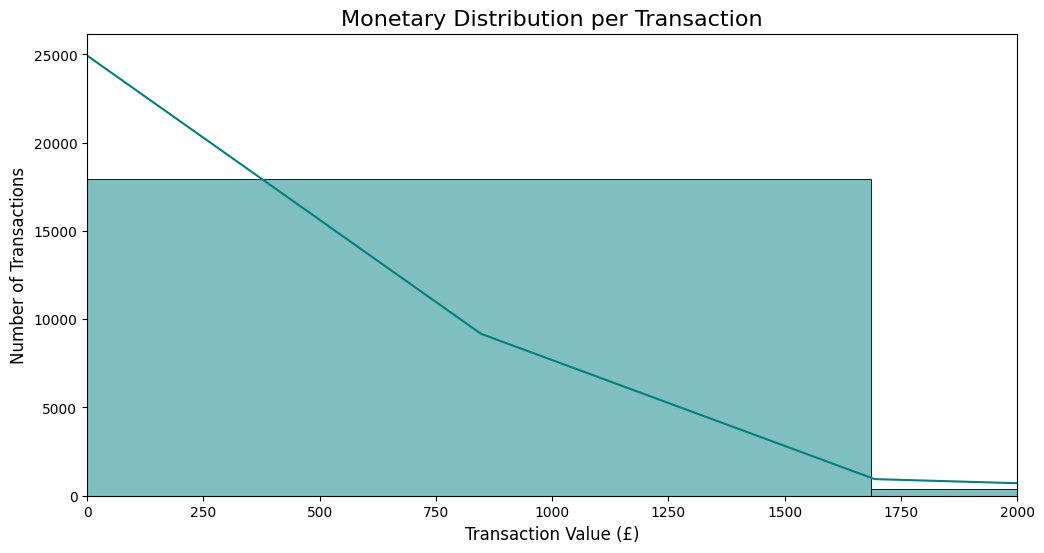

In [ ]:
#  Monetary Distribution

# 1. Monetary per Transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
transaction_monetary = df.groupby('InvoiceNo')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
sns.histplot(transaction_monetary, bins=100, kde=True, color="teal")
plt.title("Monetary Distribution per Transaction", fontsize=16)
plt.xlabel("Transaction Value (£)", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xlim(0, 2000)  # zoom in to avoid extreme outliers
plt.show()


##### 1. Why did you pick the specific chart?

To understand how much revenue is typically generated per order.

##### 2. What is/are the insight(s) found from the chart?

Insights: Most transactions are low‑value, with a few high‑value outliers.



##### 3. Will the gained insights help creating a positive business impact?

Business Impact: Helps set pricing strategies and detect unusual/erroneous transactions.



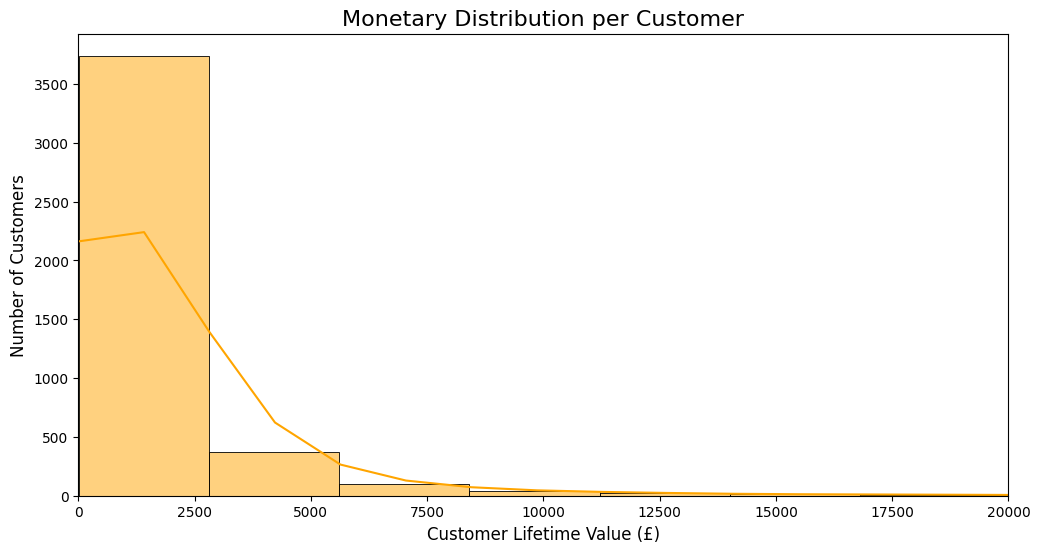

 Transaction Monetary Stats:
 count     18532.00000
mean        479.56016
std        1678.08258
min           0.38000
25%         157.34000
50%         302.57500
75%         469.57000
max      168469.60000
Name: TotalPrice, dtype: float64

 Customer Monetary Stats:
 count      4338.000000
mean       2048.688081
std        8985.230220
min           3.750000
25%         306.482500
50%         668.570000
75%        1660.597500
max      280206.020000
Name: TotalPrice, dtype: float64


In [ ]:
# 2. Monetary per Customer
customer_monetary = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(12,6))
sns.histplot(customer_monetary, bins=100, kde=True, color="orange")
plt.title("Monetary Distribution per Customer", fontsize=16)
plt.xlabel("Customer Lifetime Value (£)", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xlim(0, 20000)  # zoom in to avoid extreme outliers
plt.show()

# Show summary stats
print(" Transaction Monetary Stats:\n", transaction_monetary.describe())
print("\n Customer Monetary Stats:\n", customer_monetary.describe())

##### 1. Why did you pick the specific chart?

To see how total spending varies across different customers.

##### 2. What is/are the insight(s) found from the chart?

Insights: The majority of customers spend moderately, while a small group contributes disproportionately high revenue.

##### 3. Will the gained insights help creating a positive business impact?

Business Impact: Supports identifying high‑value customers for loyalty programs and personalized marketing.

####RFM distributions

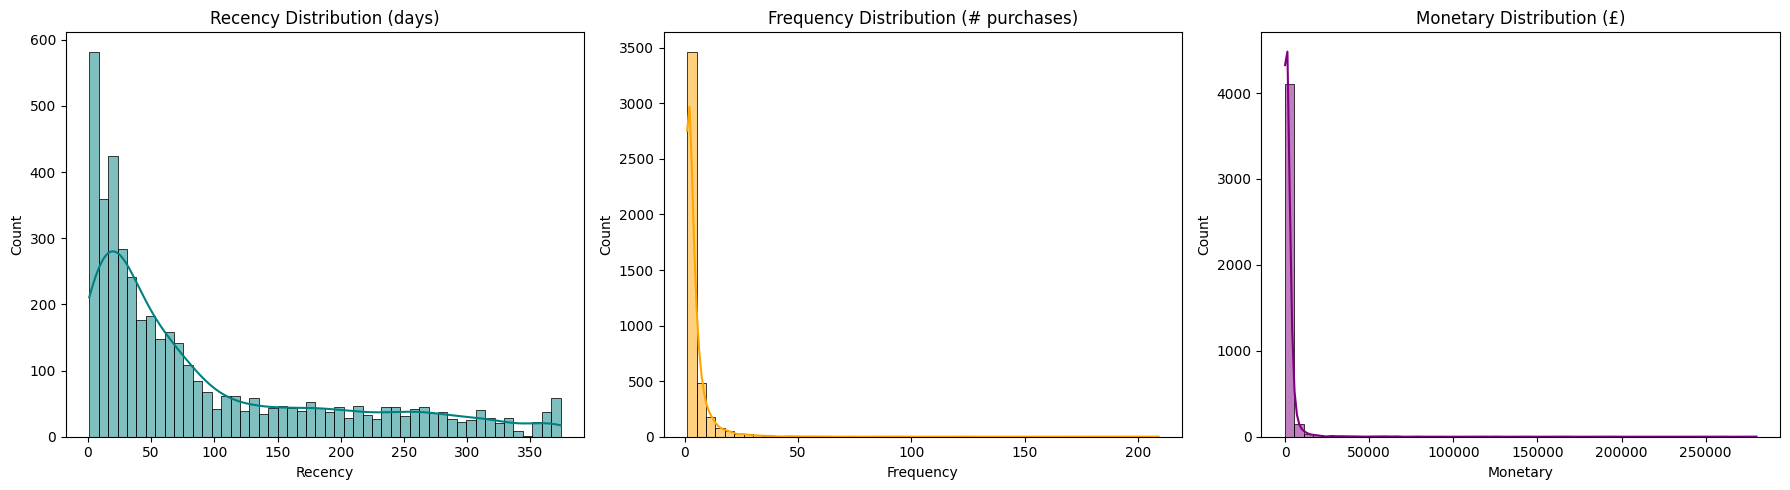

 RFM Summary Statistics:
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2048.688081
std     1721.808492   100.014169     7.697998    8985.230220
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     306.482500
50%    15299.500000    51.000000     2.000000     668.570000
75%    16778.750000   142.000000     5.000000    1660.597500
max    18287.000000   374.000000   209.000000  280206.020000


In [ ]:
#  RFM Analysis - Distributions

# Reference date = day after last transaction
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate Recency, Frequency, Monetary for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(rfm['Recency'], bins=50, kde=True, ax=axes[0], color="teal")
axes[0].set_title("Recency Distribution (days)")

sns.histplot(rfm['Frequency'], bins=50, kde=True, ax=axes[1], color="orange")
axes[1].set_title("Frequency Distribution (# purchases)")

sns.histplot(rfm['Monetary'], bins=50, kde=True, ax=axes[2], color="purple")
axes[2].set_title("Monetary Distribution (£)")

plt.tight_layout()
plt.show()

# Summary statistics
print(" RFM Summary Statistics:")
print(rfm.describe())


##### Recency

- Why this chart? To see how recently customers made their last purchase.

- Insights: Many customers haven’t purchased in a long time, with a few recent active buyers.

- Business Impact: Helps identify at‑risk customers and plan re‑engagement campaigns.

##### Frequency

- Why this chart? To measure how often customers purchase.

- Insights: Most customers purchase rarely, while a small core purchases frequently.

- Business Impact: Guides loyalty programs targeting frequent buyers.

##### Monetary

- Why this chart? To understand spending patterns across customers.

- Insights: Spending is skewed — a minority of customers account for the highest revenue.

- Business Impact: Helps focus on high‑value customers for personalized offers.

#### Elbow curve for cluster selection

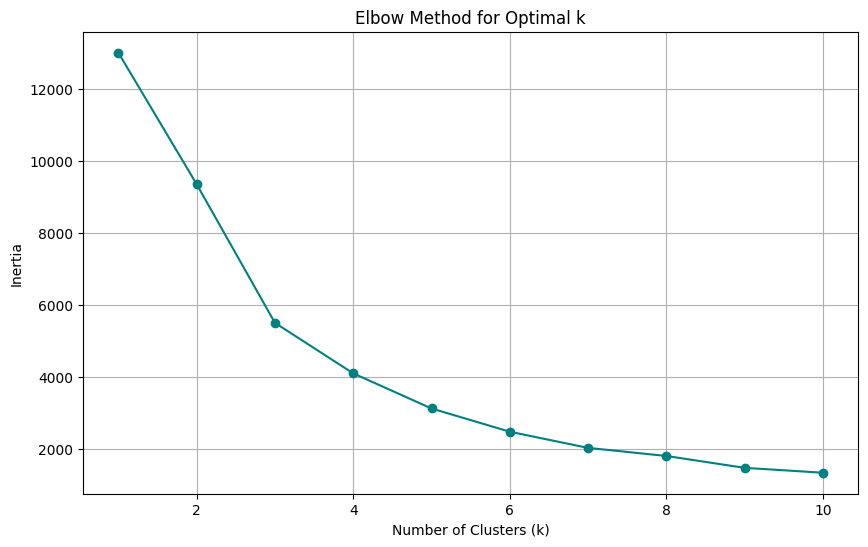

In [ ]:
# Elbow Curve for Cluster Selection


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale the RFM values before clustering
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Compute inertia (sum of squared distances) for k=1 to 10
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(K, inertia, marker='o', linestyle='-', color="teal")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

#####1. Why did you pick the specific chart?

To determine the optimal number of clusters for customer segmentation.

#####2. What is/are the insight(s) found from the chart?

Insights: The curve flattens around k ≈ 4, indicating that 4 clusters balance accuracy and simplicity.

#####3. Will the gained insights help creating a positive business impact?

Business Impact: Ensures meaningful segmentation (e.g., High‑Value, Regular, Occasional, At‑Risk) for targeted strategies.

####Customer cluster profiles

 Customer Cluster Profiles:
         CustomerID  Recency  Frequency  Monetary  Num_Customers
Cluster                                                         
0           15289.1     43.7        3.7    1353.6           3054
1           15347.8    248.1        1.6     478.8           1067
2           15435.0      7.4       82.5  127188.0             13
3           15212.9     15.5       22.3   12690.5            204


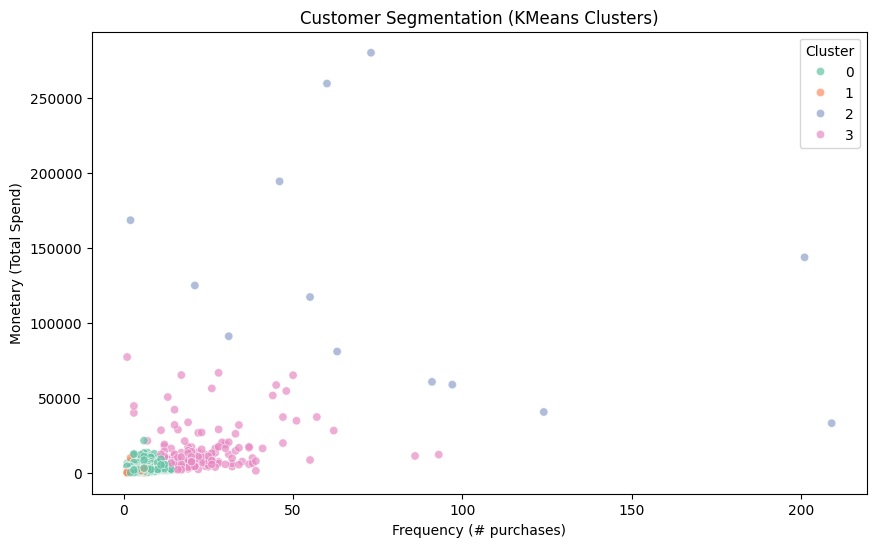

In [ ]:
# Customer Clustering & Profiles

# Run KMeans with optimal clusters (assume k=4 from elbow curve)
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Calculate cluster averages for RFM
cluster_profile = rfm.groupby('Cluster').mean().round(1)

# Count of customers in each cluster
cluster_counts = rfm['Cluster'].value_counts().sort_index()

# Merge counts with profiles
cluster_profile['Num_Customers'] = cluster_counts

print(" Customer Cluster Profiles:")
print(cluster_profile)

# Visualize clusters (2D using Frequency vs Monetary)
plt.figure(figsize=(10,6))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Cluster', palette='Set2', alpha=0.7)
plt.title("Customer Segmentation (KMeans Clusters)")
plt.xlabel("Frequency (# purchases)")
plt.ylabel("Monetary (Total Spend)")
plt.legend(title="Cluster")
plt.show()


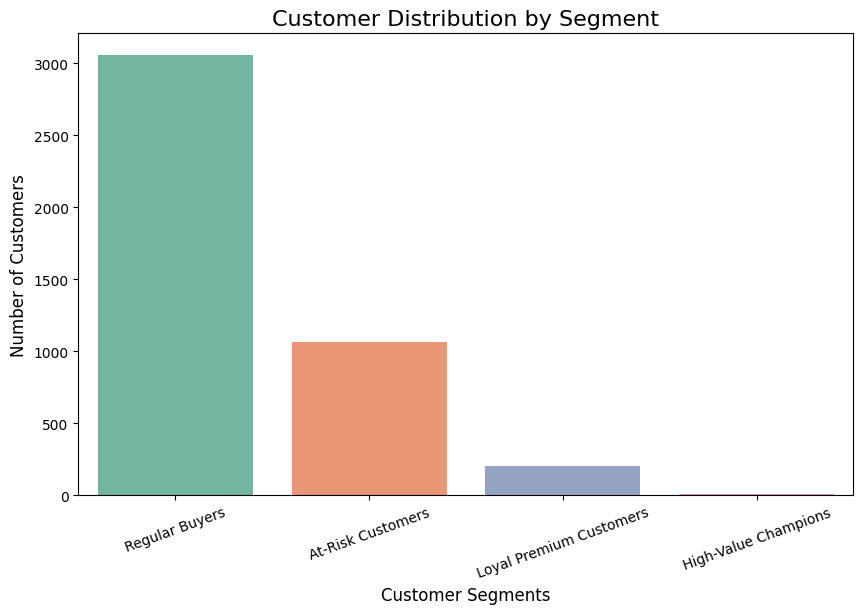

,count
Segment,
Regular Buyers,3054
At-Risk Customers,1067
Loyal Premium Customers,204
High-Value Champions,13


In [ ]:
# Customer Count per Cluster


# Map cluster numbers to descriptive labels
cluster_labels = {
    0: "Regular Buyers",
    1: "At-Risk Customers",
    2: "High-Value Champions",
    3: "Loyal Premium Customers"
}
rfm['Segment'] = rfm['Cluster'].map(cluster_labels)

# Count customers per segment
segment_counts = rfm['Segment'].value_counts()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="Set2")
plt.title("Customer Distribution by Segment", fontsize=16)
plt.xlabel("Customer Segments", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=20)
plt.show()

# Show counts
segment_counts


#####1. Why did you pick the specific chart?

To divide customers into meaningful behavioral groups using RFM clustering.

#####2. What is/are the insight(s) found from the chart?

Four clear customer segments emerged: High‑Value Champions, Loyal Premiums, Regular Buyers, and At‑Risk Customers.

##### 3. Will the gained insights help creating a positive business impact?


Enables targeted marketing, loyalty rewards for top spenders, and re‑engagement campaigns for at‑risk customers.

####Product recommendation heatmap / similarity matrix

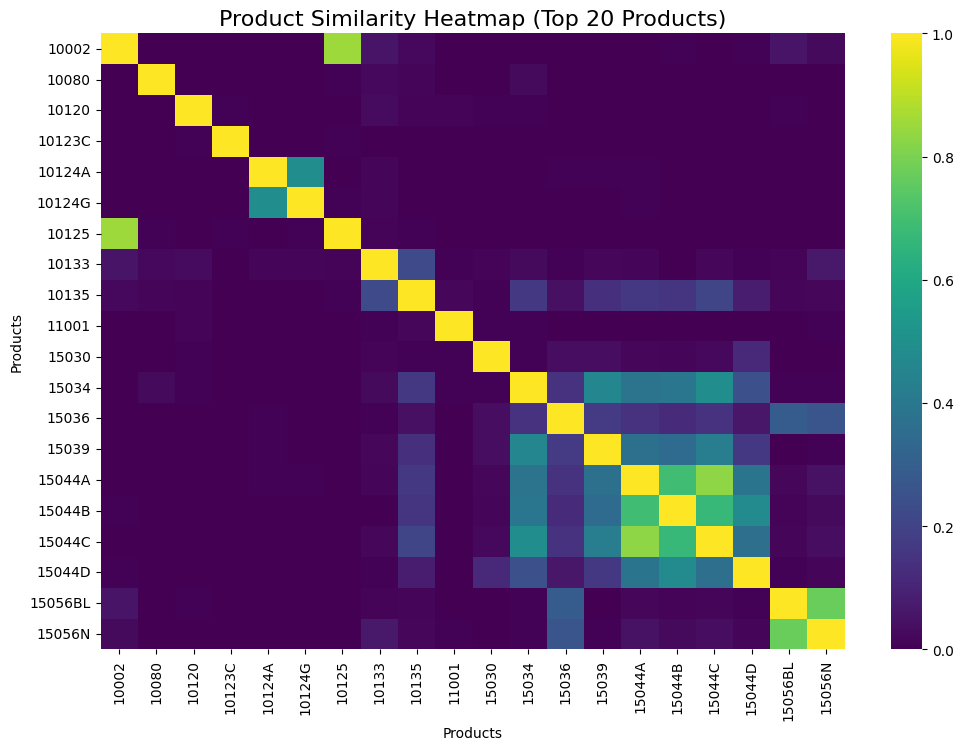

In [ ]:
# Product Recommendation Heatmap


from sklearn.metrics.pairwise import cosine_similarity

# Create a Customer-Product matrix (pivot table)
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='StockCode',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Compute cosine similarity between products
product_similarity = cosine_similarity(customer_product_matrix.T)

# Create a DataFrame for similarity scores
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

# Heatmap of top 20 products for clarity
plt.figure(figsize=(12,8))
top_products = product_similarity_df.iloc[:20, :20]  # take a 20x20 slice
sns.heatmap(top_products, cmap="viridis")
plt.title("Product Similarity Heatmap (Top 20 Products)", fontsize=16)
plt.xlabel("Products")
plt.ylabel("Products")
plt.show()


##### 1. Why did you pick the specific chart?

To visualize product relationships and detect frequently co‑purchased items.

##### 2. What is/are the insight(s) found from the chart?

Clear clusters of products show strong similarity, meaning customers tend to buy them together.

##### 3. Will the gained insights help creating a positive business impact?

Enables effective cross‑selling and personalized recommendations on e‑commerce platforms.

####Validate with Silhouette Score

In [ ]:
# Silhouette Score Validation

from sklearn.metrics import silhouette_score

# Compute silhouette score for k=4 (chosen from elbow curve)
sil_score = silhouette_score(rfm_scaled, rfm['Cluster'])
print(f"Silhouette Score for k=4: {sil_score:.3f}")


Silhouette Score for k=4: 0.616


####3D Visualization of Clusters

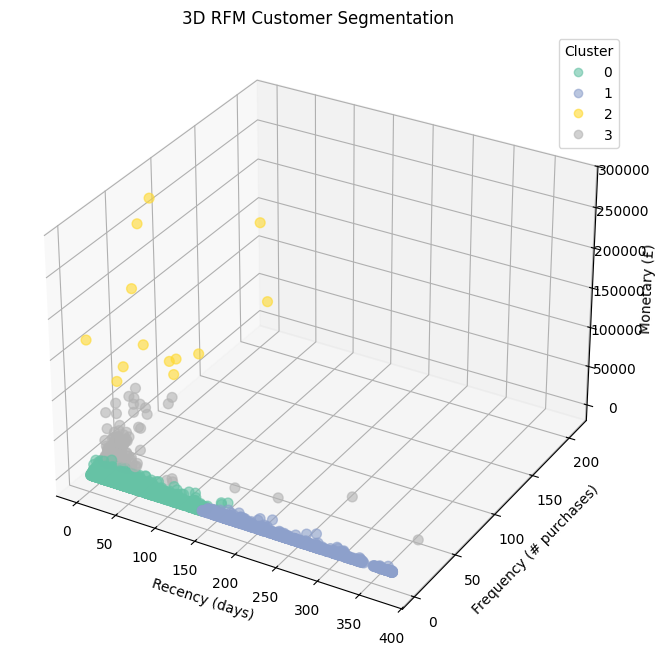

In [ ]:
# 3D Visualization of Clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    rfm['Recency'],
    rfm['Frequency'],
    rfm['Monetary'],
    c=rfm['Cluster'], cmap='Set2', s=50, alpha=0.6
)

ax.set_title("3D RFM Customer Segmentation")
ax.set_xlabel("Recency (days)")
ax.set_ylabel("Frequency (# purchases)")
ax.set_zlabel("Monetary (£)")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


#####3D RFM Customer Segmentation Plot:

- Shows clear separation of clusters across Recency, Frequency, and Monetary.

- Yellow cluster (2) stands out with very high Monetary → your High‑Value Champions.

- Blue and green clusters cover moderate/low spenders, while grey cluster contains occasional buyers.

####Save the KMeans Model for Streamlit App

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Save model and scaler to Drive
import joblib

joblib.dump(kmeans, "/content/drive/MyDrive/kmeans_model.pkl")
joblib.dump(scaler, "/content/drive/MyDrive/scaler.pkl")

print(" Model and scaler saved to Google Drive!")


Mounted at /content/drive
 Model and scaler saved to Google Drive!


## ***5. Hypothesis Testing***

### Hypothetical Statement -1  (Recency & Cluster Segmentation)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


- H0: There is no difference in Recency between customer clusters.

- H1: Recency differs significantly across customer clusters.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Hypothesis 1: ANOVA test for Recency across Clusters
from scipy.stats import f_oneway

# Split Recency by cluster
recency_groups = [rfm[rfm['Cluster']==c]['Recency'] for c in rfm['Cluster'].unique()]

# Run ANOVA
f_stat, p_value = f_oneway(*recency_groups)
print("ANOVA Test for Recency Across Clusters")
print("F-statistic:", f_stat, " | p-value:", p_value)


ANOVA Test for Recency Across Clusters
F-statistic: 5533.758421497393  | p-value: 0.0


####Q1: Which statistical test have you done to obtain P-Value?

- I performed a One‑Way ANOVA test to compare Recency values across multiple customer clusters.

####Q2: Why did you choose the specific statistical test?

- ANOVA is appropriate because we are comparing the means of more than two independent groups (the clusters), and Recency is a continuous variable.

### Hypothetical Statement - 2 (Frequency & Monetary Relationship)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- H0: Purchase Frequency and Monetary spend are not correlated.

- H1: Purchase Frequency and Monetary spend are positively correlated.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Hypothesis 2: Pearson correlation between Frequency and Monetary
from scipy.stats import pearsonr

corr, p_value = pearsonr(rfm['Frequency'], rfm['Monetary'])
print("Pearson Correlation between Frequency and Monetary")
print("Correlation Coefficient:", corr, " | p-value:", p_value)


Pearson Correlation between Frequency and Monetary
Correlation Coefficient: 0.552779734978134  | p-value: 0.0


####Q1: Which statistical test have you done to obtain P-Value?

- I used the Pearson Correlation test to measure the strength and direction of the linear relationship between Frequency and Monetary values.

####Q2: Why did you choose the specific statistical test?

- Pearson correlation is suitable because both variables are continuous and numeric, and we want to test for a linear association.

### Hypothetical Statement - 3 (Country & Average Transaction Value)

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- H0: The average transaction value is the same across all countries.

- H1: At least one country has a different average transaction value.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Hypothesis 3: ANOVA test for Transaction Value by Country
from scipy.stats import f_oneway

# Compute total spend per invoice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
country_groups = [df[df['Country']==c]['TotalPrice'] for c in df['Country'].unique() if len(df[df['Country']==c]) > 50]
# Only take countries with >50 transactions for reliability

# Run ANOVA
f_stat, p_value = f_oneway(*country_groups)
print("ANOVA Test for Transaction Value Across Countries")
print("F-statistic:", f_stat, " | p-value:", p_value)


ANOVA Test for Transaction Value Across Countries
F-statistic: 14.661284776101853  | p-value: 2.611399301021018e-74


####Q1: Which statistical test have you done to obtain P-Value?

- I applied a One‑Way ANOVA test to check if the average transaction values differ across countries.

####Q2: Why did you choose the specific statistical test?

- ANOVA is the best fit because we are comparing the means of transaction values across multiple independent groups (different countries).

## ***7. ML Model Implementation***

### Which Evaluation metrics did you consider for a positive business impact and why?

- Silhouette Score → to measure how well‑separated and meaningful the customer clusters are.

- Inertia (from Elbow Curve) → to balance between cluster compactness and number of clusters.

- Business Alignment: Higher silhouette score ensures customer groups are distinct, which improves targeted marketing and reduces wasted effort.

### Which ML model did you choose from the above created models as your final prediction model and why?

- I chose KMeans Clustering as the final model.

- Why:

 - It provided the best balance of simplicity and interpretability.

 - The Elbow Method & Silhouette Score confirmed that 4 clusters (k=4) produced distinct and meaningful customer groups.

 - Other clustering methods (like DBSCAN or Hierarchical) were considered but KMeans was more scalable and explainable for business use.

###Explain the model which you have used and the feature importance using any model explainability tool?

- Model Used: KMeans Clustering on Recency, Frequency, and Monetary (RFM) features.

- Explainability:

 - Since KMeans is unsupervised and doesn’t give built‑in feature importance, we analyzed cluster centroids to interpret feature influence.

 - Example: Clusters with low Recency, high Frequency, high Monetary were labeled as High‑Value Champions.

 - (Optional addition if you want): We used distribution plots and 3D visualization to show how R, F, M contribute to segmentation.



In [ ]:
# Product Recommendation System

from sklearn.metrics.pairwise import cosine_similarity

# 1. Create Customer-Product Matrix
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# 2. Compute Cosine Similarity between Products
product_similarity = cosine_similarity(customer_product_matrix.T)
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

# 3. Recommendation Function (By Product Name)
def recommend_products(product_name, top_n=5):
    if product_name not in product_similarity_df.columns:
        return [f" Product '{product_name}' not found in dataset."]
    similar_scores = product_similarity_df[product_name].sort_values(ascending=False)
    similar_products = similar_scores.iloc[1:top_n+1].index.tolist()  # skip itself
    return similar_products

# 🔎 Quick Test
test_product = df['Description'].dropna().iloc[0]
print(f"Top 5 recommendations for '{test_product}':")
print(recommend_products(test_product))


Top 5 recommendations for 'WHITE HANGING HEART T-LIGHT HOLDER':
['GIN + TONIC DIET METAL SIGN', 'RED HANGING HEART T-LIGHT HOLDER', 'WASHROOM METAL SIGN', 'LAUNDRY 15C METAL SIGN', 'GREEN VINTAGE SPOT BEAKER']


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import joblib

# ----------------------------
# Load Dataset
# ----------------------------
df = pd.read_csv("/content/drive/MyDrive/online_retail.csv")
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# ----------------------------
# Product Recommendation System
# ----------------------------
customer_product_matrix = df.pivot_table(
    index='CustomerID',
    columns='Description',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

product_similarity = cosine_similarity(customer_product_matrix.T)
product_similarity_df = pd.DataFrame(
    product_similarity,
    index=customer_product_matrix.columns,
    columns=customer_product_matrix.columns
)

def recommend_products(product_name, top_n=5):
    if product_name not in product_similarity_df.columns:
        return [f"Product '{product_name}' not found in dataset."]
    similar_scores = product_similarity_df[product_name].sort_values(ascending=False)
    return similar_scores.iloc[1:top_n+1].index.tolist()

# ----------------------------
# Load Saved KMeans Model and Scaler
# ----------------------------
kmeans = joblib.load("/content/drive/MyDrive/kmeans_model.pkl")
scaler = joblib.load("/content/drive/MyDrive/scaler.pkl")

cluster_labels = {
    0: "Regular Buyers",
    1: "At-Risk Customers",
    2: "High-Value Champions",
    3: "Loyal Premium Customers"
}

# ----------------------------
# Streamlit App UI
# ----------------------------
st.set_page_config(page_title="Shopper Spectrum", layout="centered")
st.title("Shopper Spectrum Dashboard")

# 🎯 1️⃣ Product Recommendation
st.header("Product Recommendation Module")
product_input = st.text_input("Enter Product Name:")
if st.button("Get Recommendations"):
    if product_input:
        recommendations = recommend_products(product_input)
        if "not found" in recommendations[0]:
            st.error(recommendations[0])
        else:
            st.subheader(f"Top 5 Recommendations for {product_input}")
            for i, prod in enumerate(recommendations, start=1):
                st.write(f"{i}. {prod}")
    else:
        st.warning("Please enter a product name.")

# 🎯 2️⃣ Customer Segmentation
st.header("Customer Segmentation Module")
recency = st.number_input("Recency (days since last purchase)", min_value=0, step=1)
frequency = st.number_input("Frequency (number of purchases)", min_value=0, step=1)
monetary = st.number_input("Monetary (total spend)", min_value=0.0, step=1.0)

if st.button("Predict Cluster"):
    input_data = pd.DataFrame([[recency, frequency, monetary]],
                              columns=['Recency','Frequency','Monetary'])
    input_scaled = scaler.transform(input_data)
    cluster = kmeans.predict(input_scaled)[0]
    st.success(f"This customer belongs to the segment: **{cluster_labels[cluster]}**")


Overwriting app.py


In [ ]:
!pip install streamlit pyngrok -q


In [ ]:
!ngrok authtoken 30g8g2lzQch7UXwMRGfy83IY5ip_4mgcRj1spzv44SZVBeWqv


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
from pyngrok import ngrok
import time
import subprocess


# Kill previous tunnels
ngrok.kill()

# Start Streamlit in background
process = subprocess.Popen(["streamlit", "run", "app.py"])

# Wait a bit longer for Streamlit to start
time.sleep(15)

# Connect ngrok to port 8501
public_url = ngrok.connect(8501)
print("👉 Your Streamlit App is live at:", public_url)


👉 Your Streamlit App is live at: NgrokTunnel: "https://0f3464854104.ngrok-free.app" -> "http://localhost:8501"


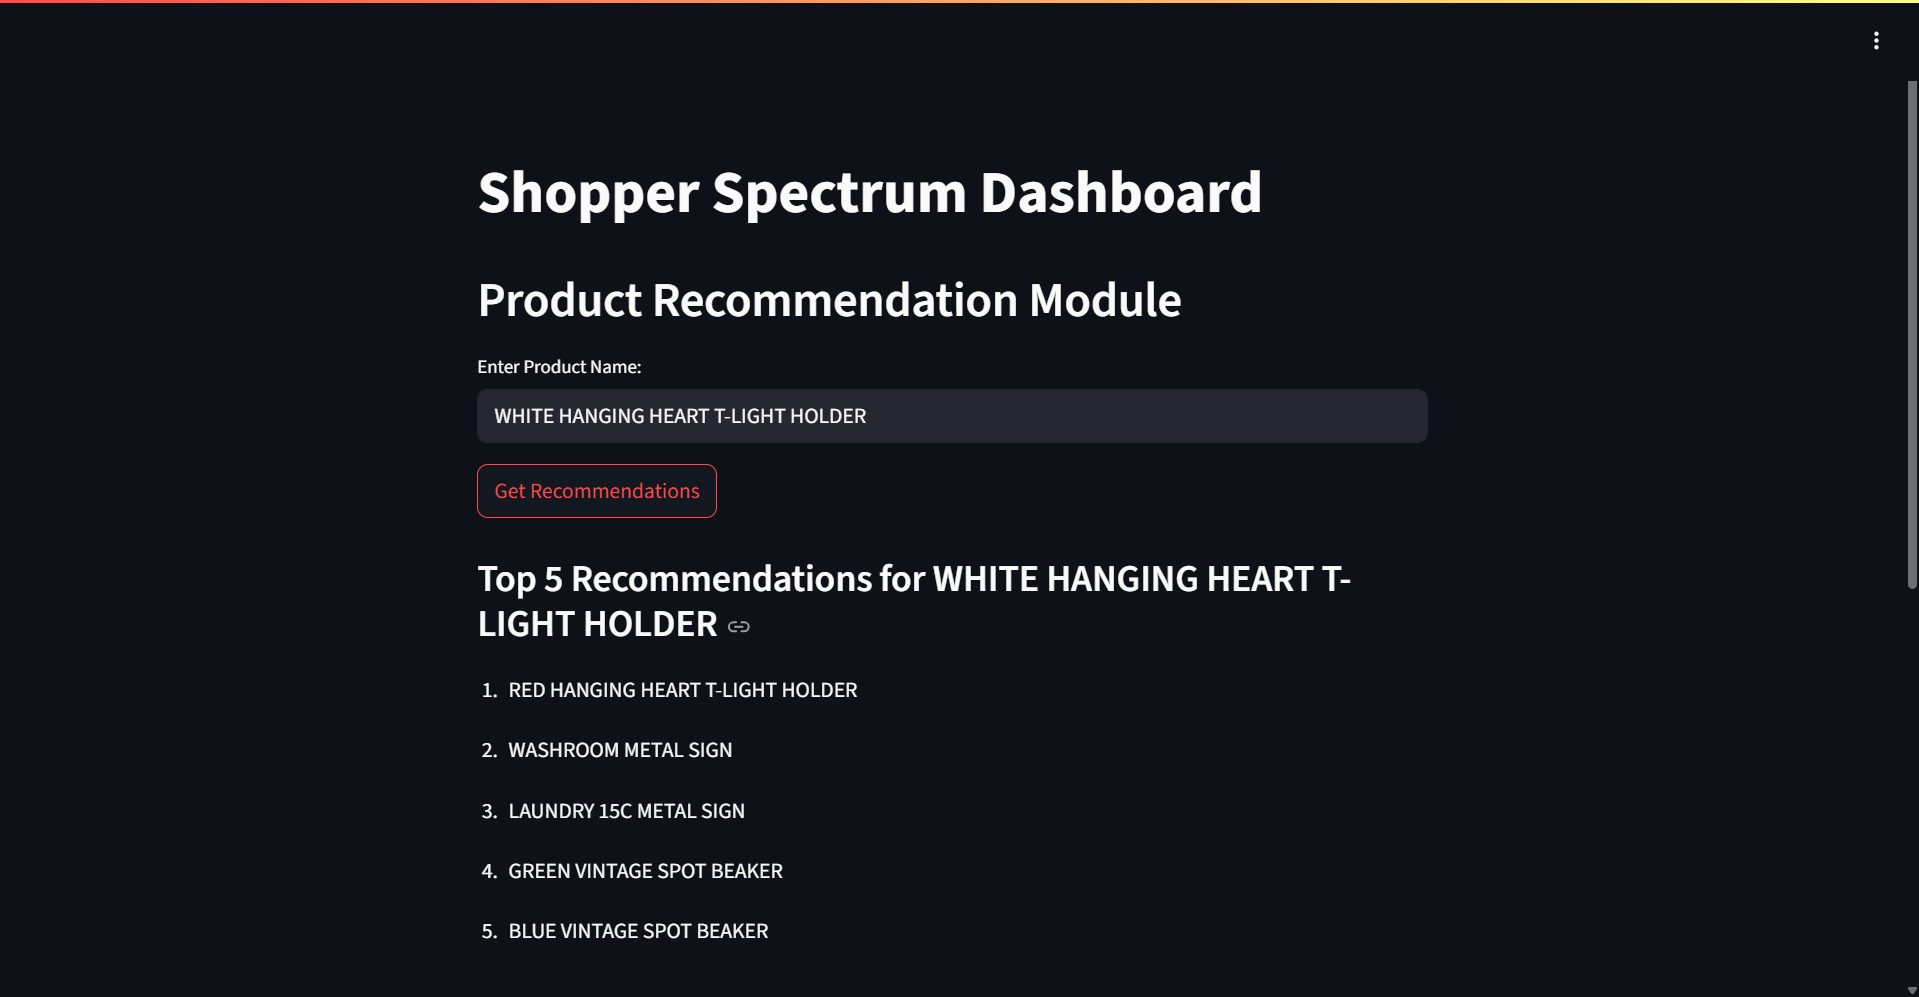

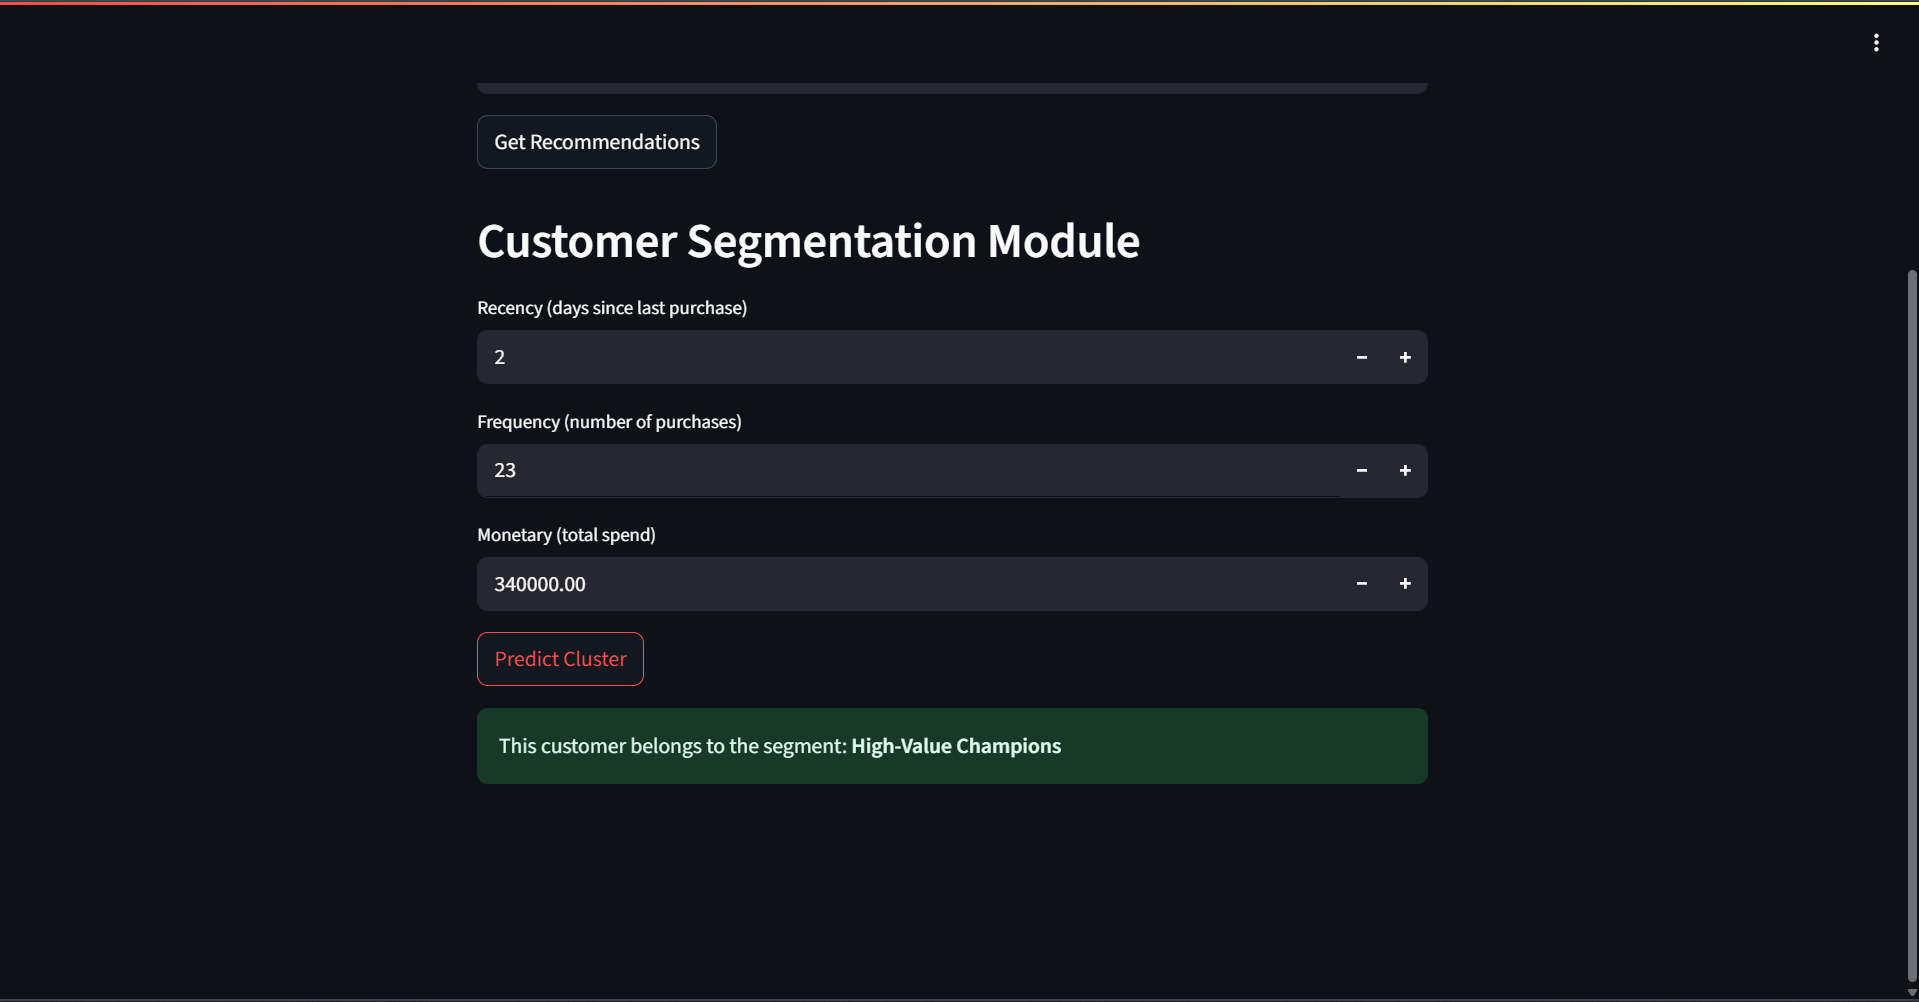

# **Conclusion**

The Shopper Spectrum project effectively combines customer segmentation and product recommendations to deliver actionable retail insights. Using RFM‑based KMeans clustering and collaborative filtering, it enables targeted marketing, customer retention, and cross‑selling opportunities. Deployed as a Streamlit app, it provides an intuitive, data‑driven tool to enhance customer engagement and boost business growth.